# Płytka sieć neuronowa w PyTorch

### Zaimportujmy zależności

In [4]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt

### Załadujmy dane i od razu przeskalujmy (funkcja ToTensor konwertuje piksele z [0,255] na [0,1])

In [5]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



### Sprawdźmy jak wyglądają dane

In [6]:
train.data.shape

torch.Size([60000, 28, 28])

In [7]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### Zobaczmy konkretne wartości

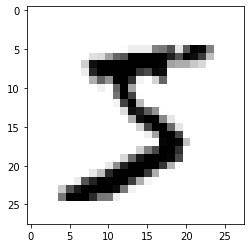

In [9]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [10]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [11]:
train.targets.shape

torch.Size([60000])

In [12]:
test.data.shape

torch.Size([10000, 28, 28])

In [13]:
test.targets.shape

torch.Size([10000])

### Popaczkujmy zbiór danych z wykorzystaniem klasy DataLoader i przejrzyjmy paczki

In [14]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128) 

In [15]:
n_batches = len(train_loader)
n_batches

469

In [16]:
n_test_batches = len(test_loader)
n_test_batches

79

In [17]:
X_sample, y_sample = iter(train_loader).next()

In [18]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [19]:
y_sample.shape

torch.Size([128])

In [20]:
y_sample

tensor([1, 7, 2, 2, 7, 6, 3, 5, 2, 2, 3, 7, 7, 4, 2, 5, 8, 9, 6, 2, 7, 3, 7, 2,
        8, 3, 8, 2, 6, 2, 7, 7, 3, 1, 8, 3, 9, 2, 4, 5, 2, 2, 9, 6, 3, 9, 8, 7,
        0, 0, 4, 8, 1, 4, 8, 0, 5, 0, 0, 5, 4, 6, 3, 7, 2, 5, 1, 3, 7, 1, 2, 5,
        2, 0, 6, 0, 0, 1, 4, 2, 7, 8, 6, 2, 1, 9, 8, 5, 0, 1, 9, 1, 0, 9, 2, 3,
        0, 1, 2, 3, 1, 6, 2, 9, 8, 7, 3, 4, 9, 6, 1, 7, 6, 2, 3, 0, 7, 9, 5, 4,
        1, 9, 7, 0, 3, 0, 3, 6])

In [21]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Spłaszczamy paczkę 
(niespodzianie służy do tego funkcja .view())

In [22]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1)

In [23]:
X_flat_sample.shape

torch.Size([128, 784])

In [24]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### Czas na zaprojektowanie architektury sieci

PyTorch opiera się na modułach (obiektach klasy `torch.nn.Module`), które są łączone w graf obliczeń. Moduły mogą wykorzystywać parametry (obiekty klasy `torch.nn.Parameter`), dla których mogą być automatycznie liczone gradienty i które mogą podlegać optymalizacji.

**Zadanie 1. Zadeklaruj odpowiedni rozmiar wejścia i wyjścia tak, by warstwa wejściowa przyjęła pojedynczo wszystkie piksele obrazka, a warstwa wyjściowa mogła reprezentować każdą z klas**

In [28]:
n_input = 784
n_dense = 64
n_out = 10

Tworzymy model, składający się z sekwencji warstw: wejściowej warstwy liniowej czyli warstwy implementującej operację $\hat{y} = Wx + b$, (zwróćmy uwagę na jej liczbę wejść i wyjść), ukrytej warstwy gęstej o 64 neuronach z sigmoidalną funkcją aktywacji oraz wyjściowej warstwy liniowej (tu również zwróćmy uwagę na liczbę wejść)

In [30]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),
    nn.Sigmoid(),
    nn.Linear(n_dense, n_out)
)

In [31]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


### Skonfigurujmy hiperparametry

**Zadanie 2. Zajrzyj do dokumentacji biblioteki torch i zadeklaruj entropię skrośną (CrossEntropy) jako funkcję straty oraz SGD jako algorytm optymalizacji - z parametrami modelu jako parametrami do optymalizacji, oraz ze stałą uczenia równą 0.01**

In [35]:
cost_fxn = torch.nn.CrossEntropyLoss()

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Zdefinujmy metrykę trafności prognozy

In [37]:
def accuracy_pct(pred_y, true_y):
    _, prediction = torch.max(pred_y, 1)
    correct = (prediction == true_y).sum().item()
    return (correct / true_y.shape[0]) * 100.0

### Wreszcie nauczmy sieć 
(zwróćmy zwłaszcza uwagę na to co się dzieje w zagnieżdżonej pętli)

In [38]:
n_epochs = 20 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
    avg_cost = 0.0
    avg_accuracy = 0.0
    
    for i, (X, y) in enumerate(train_loader): # enumerate() pozwala iterować po całym popaczkowanym zbiorze  
    
    # wykonujemy feed-forward:
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        cost = cost_fxn(y_hat, y)
        avg_cost += cost / n_batches
    
    # propagacja wsteczna i optymalizacja poprzez algorytm spadku gradientu: 
        optimizer.zero_grad() # ustawiamy gradienty w sieci na zero;
        cost.backward() #obliczamy i zbieramy gradienty
        optimizer.step() #aktualizujemy wagi z wykorzystaniem zebranych gradientów
    
    # obliczamy wartości wyznaczonej wcześniej metryki:
        accuracy = accuracy_pct(y_hat, y)
        avg_accuracy += accuracy / n_batches
    
        if (i + 1) % 100 == 0:
            print('Step {}'.format(i + 1))
            
        print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'.format(epoch + 1, n_epochs, avg_cost, avg_accuracy))

print('Training complete.')

Training for 20 epochs. 

Epoch 1/20 complete: Cost: 0.005, Accuracy: 0.0% 

Epoch 1/20 complete: Cost: 0.010, Accuracy: 0.0% 

Epoch 1/20 complete: Cost: 0.015, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.020, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.025, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.030, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.035, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.040, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.045, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.050, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.055, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.060, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.065, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.070, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.075, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.080, Accuracy: 0.4% 

Epoch 1/20 complete: Cost: 0.085, Accuracy: 0.4% 

Epoch 1/20 complete: Cost: 0.090, Accuracy: 0.4% 

Epoch 1/20 complete: Cost: 0.095, Accuracy: 0.4% 

Epoch

Epoch 1/20 complete: Cost: 0.810, Accuracy: 5.7% 

Epoch 1/20 complete: Cost: 0.815, Accuracy: 5.7% 

Epoch 1/20 complete: Cost: 0.820, Accuracy: 5.7% 

Epoch 1/20 complete: Cost: 0.825, Accuracy: 5.8% 

Epoch 1/20 complete: Cost: 0.830, Accuracy: 5.8% 

Epoch 1/20 complete: Cost: 0.834, Accuracy: 5.9% 

Epoch 1/20 complete: Cost: 0.839, Accuracy: 5.9% 

Epoch 1/20 complete: Cost: 0.844, Accuracy: 5.9% 

Epoch 1/20 complete: Cost: 0.849, Accuracy: 6.0% 

Epoch 1/20 complete: Cost: 0.854, Accuracy: 6.0% 

Epoch 1/20 complete: Cost: 0.858, Accuracy: 6.1% 

Epoch 1/20 complete: Cost: 0.863, Accuracy: 6.1% 

Epoch 1/20 complete: Cost: 0.868, Accuracy: 6.2% 

Epoch 1/20 complete: Cost: 0.873, Accuracy: 6.2% 

Epoch 1/20 complete: Cost: 0.878, Accuracy: 6.3% 

Epoch 1/20 complete: Cost: 0.882, Accuracy: 6.3% 

Epoch 1/20 complete: Cost: 0.887, Accuracy: 6.3% 

Epoch 1/20 complete: Cost: 0.892, Accuracy: 6.4% 

Epoch 1/20 complete: Cost: 0.897, Accuracy: 6.4% 

Epoch 1/20 complete: Cost: 0.90

Epoch 1/20 complete: Cost: 1.588, Accuracy: 17.2% 

Epoch 1/20 complete: Cost: 1.592, Accuracy: 17.3% 

Epoch 1/20 complete: Cost: 1.597, Accuracy: 17.4% 

Epoch 1/20 complete: Cost: 1.602, Accuracy: 17.5% 

Epoch 1/20 complete: Cost: 1.607, Accuracy: 17.5% 

Epoch 1/20 complete: Cost: 1.611, Accuracy: 17.6% 

Epoch 1/20 complete: Cost: 1.616, Accuracy: 17.7% 

Epoch 1/20 complete: Cost: 1.621, Accuracy: 17.8% 

Epoch 1/20 complete: Cost: 1.625, Accuracy: 17.9% 

Epoch 1/20 complete: Cost: 1.630, Accuracy: 18.0% 

Epoch 1/20 complete: Cost: 1.635, Accuracy: 18.1% 

Epoch 1/20 complete: Cost: 1.640, Accuracy: 18.2% 

Epoch 1/20 complete: Cost: 1.644, Accuracy: 18.3% 

Epoch 1/20 complete: Cost: 1.649, Accuracy: 18.4% 

Epoch 1/20 complete: Cost: 1.654, Accuracy: 18.5% 

Epoch 1/20 complete: Cost: 1.658, Accuracy: 18.6% 

Epoch 1/20 complete: Cost: 1.663, Accuracy: 18.7% 

Epoch 1/20 complete: Cost: 1.668, Accuracy: 18.8% 

Epoch 1/20 complete: Cost: 1.673, Accuracy: 18.8% 

Epoch 1/20 c

Epoch 2/20 complete: Cost: 0.088, Accuracy: 2.0% 

Epoch 2/20 complete: Cost: 0.092, Accuracy: 2.2% 

Epoch 2/20 complete: Cost: 0.097, Accuracy: 2.3% 

Epoch 2/20 complete: Cost: 0.102, Accuracy: 2.4% 

Epoch 2/20 complete: Cost: 0.106, Accuracy: 2.5% 

Epoch 2/20 complete: Cost: 0.111, Accuracy: 2.6% 

Epoch 2/20 complete: Cost: 0.115, Accuracy: 2.7% 

Epoch 2/20 complete: Cost: 0.120, Accuracy: 2.8% 

Epoch 2/20 complete: Cost: 0.125, Accuracy: 2.9% 

Epoch 2/20 complete: Cost: 0.129, Accuracy: 3.0% 

Epoch 2/20 complete: Cost: 0.134, Accuracy: 3.1% 

Epoch 2/20 complete: Cost: 0.138, Accuracy: 3.3% 

Epoch 2/20 complete: Cost: 0.143, Accuracy: 3.4% 

Epoch 2/20 complete: Cost: 0.147, Accuracy: 3.5% 

Epoch 2/20 complete: Cost: 0.152, Accuracy: 3.6% 

Epoch 2/20 complete: Cost: 0.157, Accuracy: 3.7% 

Epoch 2/20 complete: Cost: 0.161, Accuracy: 3.8% 

Epoch 2/20 complete: Cost: 0.166, Accuracy: 3.9% 

Epoch 2/20 complete: Cost: 0.170, Accuracy: 4.0% 

Epoch 2/20 complete: Cost: 0.17

Epoch 2/20 complete: Cost: 0.852, Accuracy: 21.0% 

Epoch 2/20 complete: Cost: 0.856, Accuracy: 21.1% 

Epoch 2/20 complete: Cost: 0.861, Accuracy: 21.2% 

Epoch 2/20 complete: Cost: 0.865, Accuracy: 21.3% 

Epoch 2/20 complete: Cost: 0.870, Accuracy: 21.5% 

Epoch 2/20 complete: Cost: 0.874, Accuracy: 21.6% 

Epoch 2/20 complete: Cost: 0.879, Accuracy: 21.7% 

Epoch 2/20 complete: Cost: 0.883, Accuracy: 21.8% 

Epoch 2/20 complete: Cost: 0.887, Accuracy: 21.9% 

Epoch 2/20 complete: Cost: 0.892, Accuracy: 22.0% 

Epoch 2/20 complete: Cost: 0.896, Accuracy: 22.2% 

Epoch 2/20 complete: Cost: 0.901, Accuracy: 22.3% 

Epoch 2/20 complete: Cost: 0.905, Accuracy: 22.4% 

Step 200
Epoch 2/20 complete: Cost: 0.910, Accuracy: 22.6% 

Epoch 2/20 complete: Cost: 0.914, Accuracy: 22.7% 

Epoch 2/20 complete: Cost: 0.919, Accuracy: 22.8% 

Epoch 2/20 complete: Cost: 0.923, Accuracy: 22.9% 

Epoch 2/20 complete: Cost: 0.928, Accuracy: 23.0% 

Epoch 2/20 complete: Cost: 0.932, Accuracy: 23.1% 

Epo

Epoch 2/20 complete: Cost: 1.553, Accuracy: 40.6% 

Epoch 2/20 complete: Cost: 1.557, Accuracy: 40.7% 

Epoch 2/20 complete: Cost: 1.561, Accuracy: 40.8% 

Epoch 2/20 complete: Cost: 1.566, Accuracy: 40.9% 

Epoch 2/20 complete: Cost: 1.570, Accuracy: 41.1% 

Epoch 2/20 complete: Cost: 1.574, Accuracy: 41.2% 

Epoch 2/20 complete: Cost: 1.579, Accuracy: 41.3% 

Epoch 2/20 complete: Cost: 1.583, Accuracy: 41.4% 

Epoch 2/20 complete: Cost: 1.587, Accuracy: 41.6% 

Epoch 2/20 complete: Cost: 1.592, Accuracy: 41.7% 

Epoch 2/20 complete: Cost: 1.596, Accuracy: 41.8% 

Epoch 2/20 complete: Cost: 1.600, Accuracy: 42.0% 

Epoch 2/20 complete: Cost: 1.605, Accuracy: 42.1% 

Epoch 2/20 complete: Cost: 1.609, Accuracy: 42.2% 

Epoch 2/20 complete: Cost: 1.613, Accuracy: 42.3% 

Epoch 2/20 complete: Cost: 1.618, Accuracy: 42.5% 

Epoch 2/20 complete: Cost: 1.622, Accuracy: 42.6% 

Epoch 2/20 complete: Cost: 1.627, Accuracy: 42.7% 

Epoch 2/20 complete: Cost: 1.631, Accuracy: 42.8% 

Epoch 2/20 c

Epoch 3/20 complete: Cost: 0.159, Accuracy: 4.9% 

Epoch 3/20 complete: Cost: 0.163, Accuracy: 5.0% 

Epoch 3/20 complete: Cost: 0.167, Accuracy: 5.2% 

Epoch 3/20 complete: Cost: 0.171, Accuracy: 5.3% 

Epoch 3/20 complete: Cost: 0.175, Accuracy: 5.4% 

Epoch 3/20 complete: Cost: 0.179, Accuracy: 5.6% 

Epoch 3/20 complete: Cost: 0.184, Accuracy: 5.7% 

Epoch 3/20 complete: Cost: 0.188, Accuracy: 5.8% 

Epoch 3/20 complete: Cost: 0.192, Accuracy: 6.0% 

Epoch 3/20 complete: Cost: 0.196, Accuracy: 6.1% 

Epoch 3/20 complete: Cost: 0.200, Accuracy: 6.2% 

Epoch 3/20 complete: Cost: 0.204, Accuracy: 6.3% 

Epoch 3/20 complete: Cost: 0.208, Accuracy: 6.5% 

Epoch 3/20 complete: Cost: 0.213, Accuracy: 6.6% 

Epoch 3/20 complete: Cost: 0.217, Accuracy: 6.7% 

Epoch 3/20 complete: Cost: 0.221, Accuracy: 6.9% 

Epoch 3/20 complete: Cost: 0.225, Accuracy: 7.0% 

Epoch 3/20 complete: Cost: 0.229, Accuracy: 7.1% 

Epoch 3/20 complete: Cost: 0.233, Accuracy: 7.2% 

Epoch 3/20 complete: Cost: 0.23

Epoch 3/20 complete: Cost: 0.816, Accuracy: 26.4% 

Epoch 3/20 complete: Cost: 0.820, Accuracy: 26.6% 

Epoch 3/20 complete: Cost: 0.824, Accuracy: 26.7% 

Epoch 3/20 complete: Cost: 0.828, Accuracy: 26.8% 

Epoch 3/20 complete: Cost: 0.832, Accuracy: 27.0% 

Epoch 3/20 complete: Cost: 0.836, Accuracy: 27.1% 

Epoch 3/20 complete: Cost: 0.840, Accuracy: 27.3% 

Epoch 3/20 complete: Cost: 0.844, Accuracy: 27.4% 

Epoch 3/20 complete: Cost: 0.848, Accuracy: 27.5% 

Epoch 3/20 complete: Cost: 0.852, Accuracy: 27.7% 

Epoch 3/20 complete: Cost: 0.856, Accuracy: 27.8% 

Epoch 3/20 complete: Cost: 0.859, Accuracy: 27.9% 

Epoch 3/20 complete: Cost: 0.863, Accuracy: 28.1% 

Epoch 3/20 complete: Cost: 0.867, Accuracy: 28.2% 

Epoch 3/20 complete: Cost: 0.871, Accuracy: 28.3% 

Epoch 3/20 complete: Cost: 0.875, Accuracy: 28.5% 

Epoch 3/20 complete: Cost: 0.879, Accuracy: 28.6% 

Epoch 3/20 complete: Cost: 0.883, Accuracy: 28.7% 

Epoch 3/20 complete: Cost: 0.887, Accuracy: 28.8% 

Epoch 3/20 c

Epoch 3/20 complete: Cost: 1.442, Accuracy: 48.8% 

Epoch 3/20 complete: Cost: 1.445, Accuracy: 48.9% 

Epoch 3/20 complete: Cost: 1.449, Accuracy: 49.0% 

Epoch 3/20 complete: Cost: 1.453, Accuracy: 49.2% 

Epoch 3/20 complete: Cost: 1.456, Accuracy: 49.3% 

Epoch 3/20 complete: Cost: 1.460, Accuracy: 49.4% 

Epoch 3/20 complete: Cost: 1.464, Accuracy: 49.6% 

Epoch 3/20 complete: Cost: 1.468, Accuracy: 49.7% 

Epoch 3/20 complete: Cost: 1.471, Accuracy: 49.9% 

Epoch 3/20 complete: Cost: 1.475, Accuracy: 50.0% 

Epoch 3/20 complete: Cost: 1.479, Accuracy: 50.1% 

Epoch 3/20 complete: Cost: 1.482, Accuracy: 50.3% 

Epoch 3/20 complete: Cost: 1.486, Accuracy: 50.4% 

Epoch 3/20 complete: Cost: 1.490, Accuracy: 50.5% 

Epoch 3/20 complete: Cost: 1.494, Accuracy: 50.7% 

Epoch 3/20 complete: Cost: 1.497, Accuracy: 50.8% 

Epoch 3/20 complete: Cost: 1.501, Accuracy: 50.9% 

Epoch 3/20 complete: Cost: 1.505, Accuracy: 51.1% 

Epoch 3/20 complete: Cost: 1.509, Accuracy: 51.2% 

Epoch 3/20 c

Epoch 4/20 complete: Cost: 0.218, Accuracy: 8.9% 

Epoch 4/20 complete: Cost: 0.221, Accuracy: 9.1% 

Epoch 4/20 complete: Cost: 0.225, Accuracy: 9.2% 

Epoch 4/20 complete: Cost: 0.228, Accuracy: 9.4% 

Epoch 4/20 complete: Cost: 0.232, Accuracy: 9.5% 

Epoch 4/20 complete: Cost: 0.235, Accuracy: 9.7% 

Epoch 4/20 complete: Cost: 0.239, Accuracy: 9.8% 

Epoch 4/20 complete: Cost: 0.243, Accuracy: 9.9% 

Epoch 4/20 complete: Cost: 0.246, Accuracy: 10.1% 

Epoch 4/20 complete: Cost: 0.250, Accuracy: 10.2% 

Epoch 4/20 complete: Cost: 0.253, Accuracy: 10.4% 

Epoch 4/20 complete: Cost: 0.257, Accuracy: 10.5% 

Epoch 4/20 complete: Cost: 0.260, Accuracy: 10.7% 

Epoch 4/20 complete: Cost: 0.263, Accuracy: 10.8% 

Epoch 4/20 complete: Cost: 0.267, Accuracy: 11.0% 

Epoch 4/20 complete: Cost: 0.270, Accuracy: 11.1% 

Epoch 4/20 complete: Cost: 0.274, Accuracy: 11.3% 

Epoch 4/20 complete: Cost: 0.277, Accuracy: 11.4% 

Epoch 4/20 complete: Cost: 0.281, Accuracy: 11.6% 

Epoch 4/20 complete:

Epoch 4/20 complete: Cost: 0.765, Accuracy: 32.6% 

Epoch 4/20 complete: Cost: 0.768, Accuracy: 32.8% 

Epoch 4/20 complete: Cost: 0.771, Accuracy: 32.9% 

Epoch 4/20 complete: Cost: 0.775, Accuracy: 33.1% 

Epoch 4/20 complete: Cost: 0.778, Accuracy: 33.2% 

Epoch 4/20 complete: Cost: 0.781, Accuracy: 33.4% 

Epoch 4/20 complete: Cost: 0.785, Accuracy: 33.5% 

Epoch 4/20 complete: Cost: 0.788, Accuracy: 33.6% 

Epoch 4/20 complete: Cost: 0.791, Accuracy: 33.8% 

Epoch 4/20 complete: Cost: 0.795, Accuracy: 33.9% 

Epoch 4/20 complete: Cost: 0.798, Accuracy: 34.1% 

Epoch 4/20 complete: Cost: 0.801, Accuracy: 34.2% 

Epoch 4/20 complete: Cost: 0.804, Accuracy: 34.4% 

Epoch 4/20 complete: Cost: 0.808, Accuracy: 34.5% 

Epoch 4/20 complete: Cost: 0.811, Accuracy: 34.7% 

Epoch 4/20 complete: Cost: 0.814, Accuracy: 34.9% 

Epoch 4/20 complete: Cost: 0.817, Accuracy: 35.0% 

Epoch 4/20 complete: Cost: 0.821, Accuracy: 35.1% 

Epoch 4/20 complete: Cost: 0.824, Accuracy: 35.3% 

Epoch 4/20 c

Epoch 4/20 complete: Cost: 1.281, Accuracy: 56.8% 

Epoch 4/20 complete: Cost: 1.284, Accuracy: 56.9% 

Epoch 4/20 complete: Cost: 1.287, Accuracy: 57.0% 

Epoch 4/20 complete: Cost: 1.290, Accuracy: 57.2% 

Epoch 4/20 complete: Cost: 1.293, Accuracy: 57.3% 

Epoch 4/20 complete: Cost: 1.296, Accuracy: 57.5% 

Epoch 4/20 complete: Cost: 1.299, Accuracy: 57.6% 

Epoch 4/20 complete: Cost: 1.302, Accuracy: 57.8% 

Epoch 4/20 complete: Cost: 1.305, Accuracy: 58.0% 

Epoch 4/20 complete: Cost: 1.309, Accuracy: 58.1% 

Epoch 4/20 complete: Cost: 1.312, Accuracy: 58.3% 

Epoch 4/20 complete: Cost: 1.315, Accuracy: 58.4% 

Epoch 4/20 complete: Cost: 1.318, Accuracy: 58.6% 

Epoch 4/20 complete: Cost: 1.321, Accuracy: 58.7% 

Epoch 4/20 complete: Cost: 1.324, Accuracy: 58.9% 

Epoch 4/20 complete: Cost: 1.327, Accuracy: 59.0% 

Epoch 4/20 complete: Cost: 1.330, Accuracy: 59.2% 

Epoch 4/20 complete: Cost: 1.333, Accuracy: 59.3% 

Step 400
Epoch 4/20 complete: Cost: 1.336, Accuracy: 59.5% 

Epo

Epoch 5/20 complete: Cost: 0.226, Accuracy: 11.7% 

Epoch 5/20 complete: Cost: 0.229, Accuracy: 11.8% 

Epoch 5/20 complete: Cost: 0.232, Accuracy: 12.0% 

Epoch 5/20 complete: Cost: 0.235, Accuracy: 12.1% 

Epoch 5/20 complete: Cost: 0.238, Accuracy: 12.3% 

Epoch 5/20 complete: Cost: 0.241, Accuracy: 12.4% 

Epoch 5/20 complete: Cost: 0.244, Accuracy: 12.6% 

Epoch 5/20 complete: Cost: 0.247, Accuracy: 12.7% 

Epoch 5/20 complete: Cost: 0.250, Accuracy: 12.9% 

Epoch 5/20 complete: Cost: 0.253, Accuracy: 13.0% 

Epoch 5/20 complete: Cost: 0.255, Accuracy: 13.2% 

Epoch 5/20 complete: Cost: 0.258, Accuracy: 13.3% 

Epoch 5/20 complete: Cost: 0.261, Accuracy: 13.5% 

Epoch 5/20 complete: Cost: 0.264, Accuracy: 13.7% 

Epoch 5/20 complete: Cost: 0.267, Accuracy: 13.8% 

Epoch 5/20 complete: Cost: 0.270, Accuracy: 14.0% 

Epoch 5/20 complete: Cost: 0.272, Accuracy: 14.1% 

Epoch 5/20 complete: Cost: 0.275, Accuracy: 14.3% 

Epoch 5/20 complete: Cost: 0.278, Accuracy: 14.5% 

Epoch 5/20 c

Epoch 5/20 complete: Cost: 0.688, Accuracy: 37.2% 

Epoch 5/20 complete: Cost: 0.691, Accuracy: 37.4% 

Epoch 5/20 complete: Cost: 0.694, Accuracy: 37.6% 

Epoch 5/20 complete: Cost: 0.697, Accuracy: 37.7% 

Epoch 5/20 complete: Cost: 0.699, Accuracy: 37.9% 

Epoch 5/20 complete: Cost: 0.702, Accuracy: 38.1% 

Epoch 5/20 complete: Cost: 0.705, Accuracy: 38.2% 

Epoch 5/20 complete: Cost: 0.708, Accuracy: 38.4% 

Epoch 5/20 complete: Cost: 0.710, Accuracy: 38.5% 

Epoch 5/20 complete: Cost: 0.713, Accuracy: 38.7% 

Epoch 5/20 complete: Cost: 0.716, Accuracy: 38.8% 

Epoch 5/20 complete: Cost: 0.719, Accuracy: 39.0% 

Epoch 5/20 complete: Cost: 0.721, Accuracy: 39.2% 

Epoch 5/20 complete: Cost: 0.724, Accuracy: 39.3% 

Epoch 5/20 complete: Cost: 0.727, Accuracy: 39.5% 

Epoch 5/20 complete: Cost: 0.729, Accuracy: 39.6% 

Epoch 5/20 complete: Cost: 0.732, Accuracy: 39.8% 

Epoch 5/20 complete: Cost: 0.735, Accuracy: 40.0% 

Epoch 5/20 complete: Cost: 0.738, Accuracy: 40.1% 

Epoch 5/20 c

Epoch 5/20 complete: Cost: 1.109, Accuracy: 62.6% 

Epoch 5/20 complete: Cost: 1.111, Accuracy: 62.7% 

Epoch 5/20 complete: Cost: 1.114, Accuracy: 62.9% 

Step 400
Epoch 5/20 complete: Cost: 1.117, Accuracy: 63.0% 

Epoch 5/20 complete: Cost: 1.119, Accuracy: 63.2% 

Epoch 5/20 complete: Cost: 1.122, Accuracy: 63.4% 

Epoch 5/20 complete: Cost: 1.125, Accuracy: 63.5% 

Epoch 5/20 complete: Cost: 1.127, Accuracy: 63.7% 

Epoch 5/20 complete: Cost: 1.130, Accuracy: 63.8% 

Epoch 5/20 complete: Cost: 1.132, Accuracy: 64.0% 

Epoch 5/20 complete: Cost: 1.135, Accuracy: 64.1% 

Epoch 5/20 complete: Cost: 1.137, Accuracy: 64.3% 

Epoch 5/20 complete: Cost: 1.140, Accuracy: 64.5% 

Epoch 5/20 complete: Cost: 1.142, Accuracy: 64.6% 

Epoch 5/20 complete: Cost: 1.145, Accuracy: 64.8% 

Epoch 5/20 complete: Cost: 1.147, Accuracy: 65.0% 

Epoch 5/20 complete: Cost: 1.150, Accuracy: 65.1% 

Epoch 5/20 complete: Cost: 1.153, Accuracy: 65.3% 

Epoch 5/20 complete: Cost: 1.155, Accuracy: 65.4% 

Epo

Epoch 6/20 complete: Cost: 0.229, Accuracy: 15.1% 

Epoch 6/20 complete: Cost: 0.232, Accuracy: 15.3% 

Epoch 6/20 complete: Cost: 0.234, Accuracy: 15.4% 

Epoch 6/20 complete: Cost: 0.236, Accuracy: 15.6% 

Epoch 6/20 complete: Cost: 0.239, Accuracy: 15.7% 

Epoch 6/20 complete: Cost: 0.241, Accuracy: 15.9% 

Epoch 6/20 complete: Cost: 0.244, Accuracy: 16.1% 

Epoch 6/20 complete: Cost: 0.246, Accuracy: 16.2% 

Step 100
Epoch 6/20 complete: Cost: 0.249, Accuracy: 16.4% 

Epoch 6/20 complete: Cost: 0.251, Accuracy: 16.6% 

Epoch 6/20 complete: Cost: 0.253, Accuracy: 16.7% 

Epoch 6/20 complete: Cost: 0.256, Accuracy: 16.9% 

Epoch 6/20 complete: Cost: 0.258, Accuracy: 17.1% 

Epoch 6/20 complete: Cost: 0.261, Accuracy: 17.2% 

Epoch 6/20 complete: Cost: 0.263, Accuracy: 17.4% 

Epoch 6/20 complete: Cost: 0.265, Accuracy: 17.6% 

Epoch 6/20 complete: Cost: 0.268, Accuracy: 17.7% 

Epoch 6/20 complete: Cost: 0.270, Accuracy: 17.9% 

Epoch 6/20 complete: Cost: 0.273, Accuracy: 18.1% 

Epo

Epoch 6/20 complete: Cost: 0.611, Accuracy: 41.4% 

Epoch 6/20 complete: Cost: 0.613, Accuracy: 41.5% 

Epoch 6/20 complete: Cost: 0.616, Accuracy: 41.7% 

Epoch 6/20 complete: Cost: 0.618, Accuracy: 41.9% 

Epoch 6/20 complete: Cost: 0.621, Accuracy: 42.1% 

Epoch 6/20 complete: Cost: 0.623, Accuracy: 42.2% 

Epoch 6/20 complete: Cost: 0.625, Accuracy: 42.4% 

Epoch 6/20 complete: Cost: 0.627, Accuracy: 42.6% 

Epoch 6/20 complete: Cost: 0.630, Accuracy: 42.7% 

Epoch 6/20 complete: Cost: 0.632, Accuracy: 42.9% 

Epoch 6/20 complete: Cost: 0.634, Accuracy: 43.1% 

Epoch 6/20 complete: Cost: 0.637, Accuracy: 43.2% 

Epoch 6/20 complete: Cost: 0.639, Accuracy: 43.4% 

Epoch 6/20 complete: Cost: 0.641, Accuracy: 43.5% 

Epoch 6/20 complete: Cost: 0.644, Accuracy: 43.7% 

Epoch 6/20 complete: Cost: 0.646, Accuracy: 43.9% 

Epoch 6/20 complete: Cost: 0.648, Accuracy: 44.1% 

Epoch 6/20 complete: Cost: 0.651, Accuracy: 44.2% 

Epoch 6/20 complete: Cost: 0.653, Accuracy: 44.4% 

Epoch 6/20 c

Epoch 6/20 complete: Cost: 0.980, Accuracy: 68.2% 

Epoch 6/20 complete: Cost: 0.982, Accuracy: 68.4% 

Epoch 6/20 complete: Cost: 0.984, Accuracy: 68.5% 

Epoch 6/20 complete: Cost: 0.987, Accuracy: 68.7% 

Epoch 6/20 complete: Cost: 0.989, Accuracy: 68.9% 

Epoch 6/20 complete: Cost: 0.991, Accuracy: 69.0% 

Epoch 6/20 complete: Cost: 0.993, Accuracy: 69.2% 

Epoch 6/20 complete: Cost: 0.995, Accuracy: 69.4% 

Epoch 6/20 complete: Cost: 0.997, Accuracy: 69.5% 

Epoch 6/20 complete: Cost: 1.000, Accuracy: 69.7% 

Epoch 6/20 complete: Cost: 1.002, Accuracy: 69.9% 

Epoch 6/20 complete: Cost: 1.004, Accuracy: 70.1% 

Epoch 6/20 complete: Cost: 1.006, Accuracy: 70.2% 

Epoch 6/20 complete: Cost: 1.008, Accuracy: 70.4% 

Epoch 6/20 complete: Cost: 1.011, Accuracy: 70.6% 

Epoch 6/20 complete: Cost: 1.013, Accuracy: 70.7% 

Epoch 6/20 complete: Cost: 1.015, Accuracy: 70.9% 

Epoch 6/20 complete: Cost: 1.017, Accuracy: 71.1% 

Epoch 6/20 complete: Cost: 1.020, Accuracy: 71.2% 

Epoch 6/20 c

Epoch 7/20 complete: Cost: 0.235, Accuracy: 18.3% 

Epoch 7/20 complete: Cost: 0.237, Accuracy: 18.5% 

Epoch 7/20 complete: Cost: 0.239, Accuracy: 18.6% 

Epoch 7/20 complete: Cost: 0.241, Accuracy: 18.8% 

Epoch 7/20 complete: Cost: 0.243, Accuracy: 19.0% 

Epoch 7/20 complete: Cost: 0.245, Accuracy: 19.1% 

Epoch 7/20 complete: Cost: 0.247, Accuracy: 19.3% 

Epoch 7/20 complete: Cost: 0.250, Accuracy: 19.5% 

Epoch 7/20 complete: Cost: 0.252, Accuracy: 19.6% 

Epoch 7/20 complete: Cost: 0.254, Accuracy: 19.8% 

Epoch 7/20 complete: Cost: 0.256, Accuracy: 20.0% 

Epoch 7/20 complete: Cost: 0.258, Accuracy: 20.1% 

Epoch 7/20 complete: Cost: 0.260, Accuracy: 20.3% 

Epoch 7/20 complete: Cost: 0.262, Accuracy: 20.5% 

Epoch 7/20 complete: Cost: 0.265, Accuracy: 20.6% 

Epoch 7/20 complete: Cost: 0.267, Accuracy: 20.8% 

Epoch 7/20 complete: Cost: 0.269, Accuracy: 21.0% 

Epoch 7/20 complete: Cost: 0.271, Accuracy: 21.2% 

Epoch 7/20 complete: Cost: 0.273, Accuracy: 21.3% 

Epoch 7/20 c

Epoch 7/20 complete: Cost: 0.571, Accuracy: 45.8% 

Epoch 7/20 complete: Cost: 0.573, Accuracy: 46.0% 

Epoch 7/20 complete: Cost: 0.575, Accuracy: 46.1% 

Epoch 7/20 complete: Cost: 0.577, Accuracy: 46.3% 

Epoch 7/20 complete: Cost: 0.579, Accuracy: 46.5% 

Epoch 7/20 complete: Cost: 0.581, Accuracy: 46.6% 

Epoch 7/20 complete: Cost: 0.583, Accuracy: 46.8% 

Epoch 7/20 complete: Cost: 0.585, Accuracy: 47.0% 

Epoch 7/20 complete: Cost: 0.587, Accuracy: 47.2% 

Epoch 7/20 complete: Cost: 0.589, Accuracy: 47.3% 

Epoch 7/20 complete: Cost: 0.591, Accuracy: 47.5% 

Epoch 7/20 complete: Cost: 0.592, Accuracy: 47.7% 

Epoch 7/20 complete: Cost: 0.594, Accuracy: 47.9% 

Epoch 7/20 complete: Cost: 0.596, Accuracy: 48.1% 

Epoch 7/20 complete: Cost: 0.598, Accuracy: 48.2% 

Epoch 7/20 complete: Cost: 0.600, Accuracy: 48.4% 

Epoch 7/20 complete: Cost: 0.602, Accuracy: 48.6% 

Epoch 7/20 complete: Cost: 0.604, Accuracy: 48.7% 

Epoch 7/20 complete: Cost: 0.606, Accuracy: 48.9% 

Epoch 7/20 c

Epoch 7/20 complete: Cost: 0.902, Accuracy: 74.8% 

Epoch 7/20 complete: Cost: 0.904, Accuracy: 74.9% 

Epoch 7/20 complete: Cost: 0.906, Accuracy: 75.1% 

Epoch 7/20 complete: Cost: 0.908, Accuracy: 75.3% 

Epoch 7/20 complete: Cost: 0.910, Accuracy: 75.4% 

Epoch 7/20 complete: Cost: 0.912, Accuracy: 75.6% 

Epoch 7/20 complete: Cost: 0.914, Accuracy: 75.8% 

Epoch 7/20 complete: Cost: 0.916, Accuracy: 76.0% 

Epoch 7/20 complete: Cost: 0.918, Accuracy: 76.1% 

Epoch 7/20 complete: Cost: 0.920, Accuracy: 76.3% 

Epoch 7/20 complete: Cost: 0.922, Accuracy: 76.5% 

Epoch 7/20 complete: Cost: 0.924, Accuracy: 76.6% 

Epoch 7/20 complete: Cost: 0.926, Accuracy: 76.8% 

Epoch 7/20 complete: Cost: 0.928, Accuracy: 77.0% 

Epoch 7/20 complete: Cost: 0.929, Accuracy: 77.2% 

Epoch 7/20 complete: Cost: 0.931, Accuracy: 77.3% 

Epoch 7/20 complete: Cost: 0.933, Accuracy: 77.5% 

Epoch 7/20 complete: Cost: 0.935, Accuracy: 77.7% 

Epoch 7/20 complete: Cost: 0.937, Accuracy: 77.9% 

Epoch 7/20 c

Epoch 8/20 complete: Cost: 0.243, Accuracy: 22.2% 

Epoch 8/20 complete: Cost: 0.245, Accuracy: 22.4% 

Epoch 8/20 complete: Cost: 0.247, Accuracy: 22.5% 

Epoch 8/20 complete: Cost: 0.249, Accuracy: 22.7% 

Epoch 8/20 complete: Cost: 0.250, Accuracy: 22.8% 

Epoch 8/20 complete: Cost: 0.252, Accuracy: 23.0% 

Epoch 8/20 complete: Cost: 0.254, Accuracy: 23.2% 

Epoch 8/20 complete: Cost: 0.256, Accuracy: 23.4% 

Epoch 8/20 complete: Cost: 0.258, Accuracy: 23.6% 

Epoch 8/20 complete: Cost: 0.260, Accuracy: 23.7% 

Epoch 8/20 complete: Cost: 0.262, Accuracy: 23.9% 

Epoch 8/20 complete: Cost: 0.263, Accuracy: 24.1% 

Epoch 8/20 complete: Cost: 0.265, Accuracy: 24.3% 

Epoch 8/20 complete: Cost: 0.267, Accuracy: 24.4% 

Epoch 8/20 complete: Cost: 0.269, Accuracy: 24.6% 

Epoch 8/20 complete: Cost: 0.270, Accuracy: 24.8% 

Epoch 8/20 complete: Cost: 0.272, Accuracy: 25.0% 

Epoch 8/20 complete: Cost: 0.274, Accuracy: 25.1% 

Epoch 8/20 complete: Cost: 0.276, Accuracy: 25.3% 

Epoch 8/20 c

Epoch 8/20 complete: Cost: 0.544, Accuracy: 50.8% 

Epoch 8/20 complete: Cost: 0.545, Accuracy: 51.0% 

Epoch 8/20 complete: Cost: 0.547, Accuracy: 51.2% 

Epoch 8/20 complete: Cost: 0.549, Accuracy: 51.4% 

Epoch 8/20 complete: Cost: 0.551, Accuracy: 51.5% 

Epoch 8/20 complete: Cost: 0.553, Accuracy: 51.7% 

Epoch 8/20 complete: Cost: 0.554, Accuracy: 51.9% 

Epoch 8/20 complete: Cost: 0.556, Accuracy: 52.0% 

Step 300
Epoch 8/20 complete: Cost: 0.558, Accuracy: 52.2% 

Epoch 8/20 complete: Cost: 0.560, Accuracy: 52.4% 

Epoch 8/20 complete: Cost: 0.562, Accuracy: 52.6% 

Epoch 8/20 complete: Cost: 0.563, Accuracy: 52.7% 

Epoch 8/20 complete: Cost: 0.565, Accuracy: 52.9% 

Epoch 8/20 complete: Cost: 0.567, Accuracy: 53.1% 

Epoch 8/20 complete: Cost: 0.569, Accuracy: 53.3% 

Epoch 8/20 complete: Cost: 0.570, Accuracy: 53.5% 

Epoch 8/20 complete: Cost: 0.572, Accuracy: 53.6% 

Epoch 8/20 complete: Cost: 0.574, Accuracy: 53.8% 

Epoch 8/20 complete: Cost: 0.576, Accuracy: 54.0% 

Epo

Epoch 8/20 complete: Cost: 0.840, Accuracy: 80.3% 

Epoch 8/20 complete: Cost: 0.842, Accuracy: 80.5% 

Epoch 8/20 complete: Cost: 0.844, Accuracy: 80.7% 

Epoch 8/20 complete: Cost: 0.845, Accuracy: 80.8% 

Epoch 8/20 complete: Cost: 0.847, Accuracy: 81.0% 

Epoch 8/20 complete: Cost: 0.849, Accuracy: 81.2% 

Epoch 8/20 complete: Cost: 0.851, Accuracy: 81.4% 

Epoch 8/20 complete: Cost: 0.852, Accuracy: 81.5% 

Epoch 8/20 complete: Cost: 0.854, Accuracy: 81.7% 

Epoch 8/20 complete: Cost: 0.856, Accuracy: 81.9% 

Epoch 9/20 complete: Cost: 0.002, Accuracy: 0.2% 

Epoch 9/20 complete: Cost: 0.004, Accuracy: 0.3% 

Epoch 9/20 complete: Cost: 0.005, Accuracy: 0.5% 

Epoch 9/20 complete: Cost: 0.007, Accuracy: 0.7% 

Epoch 9/20 complete: Cost: 0.009, Accuracy: 0.9% 

Epoch 9/20 complete: Cost: 0.011, Accuracy: 1.0% 

Epoch 9/20 complete: Cost: 0.013, Accuracy: 1.2% 

Epoch 9/20 complete: Cost: 0.014, Accuracy: 1.4% 

Epoch 9/20 complete: Cost: 0.016, Accuracy: 1.6% 

Epoch 9/20 complete: 

Epoch 9/20 complete: Cost: 0.258, Accuracy: 26.9% 

Epoch 9/20 complete: Cost: 0.259, Accuracy: 27.1% 

Epoch 9/20 complete: Cost: 0.261, Accuracy: 27.3% 

Epoch 9/20 complete: Cost: 0.262, Accuracy: 27.4% 

Epoch 9/20 complete: Cost: 0.264, Accuracy: 27.6% 

Epoch 9/20 complete: Cost: 0.266, Accuracy: 27.8% 

Epoch 9/20 complete: Cost: 0.268, Accuracy: 27.9% 

Epoch 9/20 complete: Cost: 0.269, Accuracy: 28.1% 

Epoch 9/20 complete: Cost: 0.271, Accuracy: 28.3% 

Epoch 9/20 complete: Cost: 0.273, Accuracy: 28.5% 

Epoch 9/20 complete: Cost: 0.275, Accuracy: 28.6% 

Epoch 9/20 complete: Cost: 0.276, Accuracy: 28.8% 

Epoch 9/20 complete: Cost: 0.278, Accuracy: 29.0% 

Epoch 9/20 complete: Cost: 0.279, Accuracy: 29.2% 

Epoch 9/20 complete: Cost: 0.281, Accuracy: 29.4% 

Epoch 9/20 complete: Cost: 0.283, Accuracy: 29.5% 

Epoch 9/20 complete: Cost: 0.284, Accuracy: 29.7% 

Epoch 9/20 complete: Cost: 0.286, Accuracy: 29.9% 

Epoch 9/20 complete: Cost: 0.288, Accuracy: 30.1% 

Epoch 9/20 c

Epoch 9/20 complete: Cost: 0.524, Accuracy: 55.7% 

Epoch 9/20 complete: Cost: 0.526, Accuracy: 55.9% 

Epoch 9/20 complete: Cost: 0.527, Accuracy: 56.0% 

Epoch 9/20 complete: Cost: 0.529, Accuracy: 56.2% 

Epoch 9/20 complete: Cost: 0.530, Accuracy: 56.4% 

Epoch 9/20 complete: Cost: 0.532, Accuracy: 56.6% 

Epoch 9/20 complete: Cost: 0.533, Accuracy: 56.8% 

Epoch 9/20 complete: Cost: 0.535, Accuracy: 57.0% 

Epoch 9/20 complete: Cost: 0.536, Accuracy: 57.1% 

Epoch 9/20 complete: Cost: 0.538, Accuracy: 57.3% 

Epoch 9/20 complete: Cost: 0.540, Accuracy: 57.5% 

Epoch 9/20 complete: Cost: 0.541, Accuracy: 57.7% 

Epoch 9/20 complete: Cost: 0.543, Accuracy: 57.8% 

Epoch 9/20 complete: Cost: 0.545, Accuracy: 58.0% 

Epoch 9/20 complete: Cost: 0.546, Accuracy: 58.2% 

Epoch 9/20 complete: Cost: 0.548, Accuracy: 58.4% 

Epoch 9/20 complete: Cost: 0.549, Accuracy: 58.5% 

Epoch 9/20 complete: Cost: 0.551, Accuracy: 58.7% 

Epoch 9/20 complete: Cost: 0.553, Accuracy: 58.9% 

Epoch 9/20 c

Epoch 10/20 complete: Cost: 0.016, Accuracy: 1.8% 

Epoch 10/20 complete: Cost: 0.017, Accuracy: 2.0% 

Epoch 10/20 complete: Cost: 0.019, Accuracy: 2.2% 

Epoch 10/20 complete: Cost: 0.021, Accuracy: 2.3% 

Epoch 10/20 complete: Cost: 0.023, Accuracy: 2.5% 

Epoch 10/20 complete: Cost: 0.024, Accuracy: 2.7% 

Epoch 10/20 complete: Cost: 0.026, Accuracy: 2.9% 

Epoch 10/20 complete: Cost: 0.027, Accuracy: 3.1% 

Epoch 10/20 complete: Cost: 0.029, Accuracy: 3.2% 

Epoch 10/20 complete: Cost: 0.030, Accuracy: 3.4% 

Epoch 10/20 complete: Cost: 0.032, Accuracy: 3.6% 

Epoch 10/20 complete: Cost: 0.034, Accuracy: 3.7% 

Epoch 10/20 complete: Cost: 0.036, Accuracy: 3.9% 

Epoch 10/20 complete: Cost: 0.037, Accuracy: 4.1% 

Epoch 10/20 complete: Cost: 0.039, Accuracy: 4.3% 

Epoch 10/20 complete: Cost: 0.040, Accuracy: 4.5% 

Epoch 10/20 complete: Cost: 0.042, Accuracy: 4.6% 

Epoch 10/20 complete: Cost: 0.043, Accuracy: 4.8% 

Epoch 10/20 complete: Cost: 0.045, Accuracy: 5.0% 

Epoch 10/20 

Epoch 10/20 complete: Cost: 0.270, Accuracy: 31.0% 

Epoch 10/20 complete: Cost: 0.272, Accuracy: 31.2% 

Epoch 10/20 complete: Cost: 0.273, Accuracy: 31.3% 

Epoch 10/20 complete: Cost: 0.275, Accuracy: 31.5% 

Epoch 10/20 complete: Cost: 0.277, Accuracy: 31.7% 

Epoch 10/20 complete: Cost: 0.278, Accuracy: 31.9% 

Epoch 10/20 complete: Cost: 0.280, Accuracy: 32.1% 

Epoch 10/20 complete: Cost: 0.281, Accuracy: 32.2% 

Epoch 10/20 complete: Cost: 0.283, Accuracy: 32.4% 

Epoch 10/20 complete: Cost: 0.284, Accuracy: 32.6% 

Epoch 10/20 complete: Cost: 0.286, Accuracy: 32.8% 

Epoch 10/20 complete: Cost: 0.287, Accuracy: 32.9% 

Epoch 10/20 complete: Cost: 0.289, Accuracy: 33.1% 

Epoch 10/20 complete: Cost: 0.291, Accuracy: 33.3% 

Epoch 10/20 complete: Cost: 0.292, Accuracy: 33.5% 

Epoch 10/20 complete: Cost: 0.294, Accuracy: 33.7% 

Epoch 10/20 complete: Cost: 0.295, Accuracy: 33.9% 

Epoch 10/20 complete: Cost: 0.297, Accuracy: 34.0% 

Epoch 10/20 complete: Cost: 0.298, Accuracy: 3

Epoch 10/20 complete: Cost: 0.503, Accuracy: 58.8% 

Epoch 10/20 complete: Cost: 0.504, Accuracy: 59.0% 

Epoch 10/20 complete: Cost: 0.506, Accuracy: 59.2% 

Epoch 10/20 complete: Cost: 0.507, Accuracy: 59.3% 

Epoch 10/20 complete: Cost: 0.508, Accuracy: 59.5% 

Epoch 10/20 complete: Cost: 0.510, Accuracy: 59.7% 

Epoch 10/20 complete: Cost: 0.512, Accuracy: 59.9% 

Epoch 10/20 complete: Cost: 0.513, Accuracy: 60.1% 

Epoch 10/20 complete: Cost: 0.514, Accuracy: 60.3% 

Epoch 10/20 complete: Cost: 0.516, Accuracy: 60.4% 

Epoch 10/20 complete: Cost: 0.518, Accuracy: 60.6% 

Epoch 10/20 complete: Cost: 0.519, Accuracy: 60.8% 

Epoch 10/20 complete: Cost: 0.521, Accuracy: 61.0% 

Epoch 10/20 complete: Cost: 0.522, Accuracy: 61.2% 

Epoch 10/20 complete: Cost: 0.523, Accuracy: 61.3% 

Epoch 10/20 complete: Cost: 0.525, Accuracy: 61.5% 

Epoch 10/20 complete: Cost: 0.526, Accuracy: 61.7% 

Epoch 10/20 complete: Cost: 0.528, Accuracy: 61.9% 

Epoch 10/20 complete: Cost: 0.529, Accuracy: 6

Epoch 11/20 complete: Cost: 0.020, Accuracy: 2.5% 

Epoch 11/20 complete: Cost: 0.022, Accuracy: 2.7% 

Epoch 11/20 complete: Cost: 0.023, Accuracy: 2.9% 

Epoch 11/20 complete: Cost: 0.025, Accuracy: 3.1% 

Epoch 11/20 complete: Cost: 0.026, Accuracy: 3.2% 

Epoch 11/20 complete: Cost: 0.028, Accuracy: 3.4% 

Epoch 11/20 complete: Cost: 0.029, Accuracy: 3.6% 

Epoch 11/20 complete: Cost: 0.031, Accuracy: 3.8% 

Epoch 11/20 complete: Cost: 0.032, Accuracy: 4.0% 

Epoch 11/20 complete: Cost: 0.034, Accuracy: 4.1% 

Epoch 11/20 complete: Cost: 0.035, Accuracy: 4.3% 

Epoch 11/20 complete: Cost: 0.037, Accuracy: 4.5% 

Epoch 11/20 complete: Cost: 0.038, Accuracy: 4.7% 

Epoch 11/20 complete: Cost: 0.039, Accuracy: 4.9% 

Epoch 11/20 complete: Cost: 0.040, Accuracy: 5.1% 

Epoch 11/20 complete: Cost: 0.042, Accuracy: 5.3% 

Epoch 11/20 complete: Cost: 0.043, Accuracy: 5.4% 

Epoch 11/20 complete: Cost: 0.045, Accuracy: 5.6% 

Epoch 11/20 complete: Cost: 0.046, Accuracy: 5.8% 

Epoch 11/20 

Epoch 11/20 complete: Cost: 0.245, Accuracy: 30.7% 

Epoch 11/20 complete: Cost: 0.246, Accuracy: 30.9% 

Epoch 11/20 complete: Cost: 0.248, Accuracy: 31.1% 

Epoch 11/20 complete: Cost: 0.249, Accuracy: 31.3% 

Epoch 11/20 complete: Cost: 0.251, Accuracy: 31.4% 

Epoch 11/20 complete: Cost: 0.252, Accuracy: 31.6% 

Epoch 11/20 complete: Cost: 0.253, Accuracy: 31.8% 

Epoch 11/20 complete: Cost: 0.255, Accuracy: 32.0% 

Epoch 11/20 complete: Cost: 0.256, Accuracy: 32.2% 

Epoch 11/20 complete: Cost: 0.258, Accuracy: 32.4% 

Epoch 11/20 complete: Cost: 0.259, Accuracy: 32.6% 

Epoch 11/20 complete: Cost: 0.260, Accuracy: 32.7% 

Epoch 11/20 complete: Cost: 0.262, Accuracy: 32.9% 

Epoch 11/20 complete: Cost: 0.263, Accuracy: 33.1% 

Epoch 11/20 complete: Cost: 0.264, Accuracy: 33.3% 

Epoch 11/20 complete: Cost: 0.266, Accuracy: 33.5% 

Epoch 11/20 complete: Cost: 0.267, Accuracy: 33.6% 

Epoch 11/20 complete: Cost: 0.269, Accuracy: 33.8% 

Epoch 11/20 complete: Cost: 0.270, Accuracy: 3

Epoch 11/20 complete: Cost: 0.466, Accuracy: 59.2% 

Epoch 11/20 complete: Cost: 0.467, Accuracy: 59.4% 

Epoch 11/20 complete: Cost: 0.469, Accuracy: 59.6% 

Epoch 11/20 complete: Cost: 0.470, Accuracy: 59.8% 

Epoch 11/20 complete: Cost: 0.471, Accuracy: 59.9% 

Epoch 11/20 complete: Cost: 0.473, Accuracy: 60.1% 

Epoch 11/20 complete: Cost: 0.474, Accuracy: 60.3% 

Epoch 11/20 complete: Cost: 0.476, Accuracy: 60.5% 

Epoch 11/20 complete: Cost: 0.477, Accuracy: 60.7% 

Epoch 11/20 complete: Cost: 0.479, Accuracy: 60.8% 

Epoch 11/20 complete: Cost: 0.480, Accuracy: 61.0% 

Epoch 11/20 complete: Cost: 0.482, Accuracy: 61.2% 

Epoch 11/20 complete: Cost: 0.483, Accuracy: 61.4% 

Epoch 11/20 complete: Cost: 0.485, Accuracy: 61.5% 

Epoch 11/20 complete: Cost: 0.486, Accuracy: 61.7% 

Epoch 11/20 complete: Cost: 0.487, Accuracy: 61.9% 

Epoch 11/20 complete: Cost: 0.489, Accuracy: 62.1% 

Epoch 11/20 complete: Cost: 0.490, Accuracy: 62.3% 

Epoch 11/20 complete: Cost: 0.491, Accuracy: 6

Epoch 12/20 complete: Cost: 0.026, Accuracy: 3.5% 

Epoch 12/20 complete: Cost: 0.027, Accuracy: 3.6% 

Epoch 12/20 complete: Cost: 0.028, Accuracy: 3.8% 

Epoch 12/20 complete: Cost: 0.030, Accuracy: 4.0% 

Epoch 12/20 complete: Cost: 0.031, Accuracy: 4.2% 

Epoch 12/20 complete: Cost: 0.032, Accuracy: 4.4% 

Epoch 12/20 complete: Cost: 0.034, Accuracy: 4.6% 

Epoch 12/20 complete: Cost: 0.035, Accuracy: 4.8% 

Epoch 12/20 complete: Cost: 0.036, Accuracy: 4.9% 

Epoch 12/20 complete: Cost: 0.038, Accuracy: 5.1% 

Epoch 12/20 complete: Cost: 0.039, Accuracy: 5.3% 

Epoch 12/20 complete: Cost: 0.040, Accuracy: 5.5% 

Epoch 12/20 complete: Cost: 0.042, Accuracy: 5.7% 

Epoch 12/20 complete: Cost: 0.043, Accuracy: 5.8% 

Epoch 12/20 complete: Cost: 0.045, Accuracy: 6.0% 

Epoch 12/20 complete: Cost: 0.046, Accuracy: 6.2% 

Epoch 12/20 complete: Cost: 0.047, Accuracy: 6.4% 

Epoch 12/20 complete: Cost: 0.049, Accuracy: 6.6% 

Epoch 12/20 complete: Cost: 0.050, Accuracy: 6.7% 

Epoch 12/20 


Epoch 12/20 complete: Cost: 0.237, Accuracy: 32.1% 

Epoch 12/20 complete: Cost: 0.239, Accuracy: 32.2% 

Epoch 12/20 complete: Cost: 0.240, Accuracy: 32.4% 

Epoch 12/20 complete: Cost: 0.242, Accuracy: 32.6% 

Epoch 12/20 complete: Cost: 0.243, Accuracy: 32.8% 

Epoch 12/20 complete: Cost: 0.244, Accuracy: 33.0% 

Epoch 12/20 complete: Cost: 0.246, Accuracy: 33.2% 

Epoch 12/20 complete: Cost: 0.247, Accuracy: 33.3% 

Epoch 12/20 complete: Cost: 0.248, Accuracy: 33.5% 

Epoch 12/20 complete: Cost: 0.250, Accuracy: 33.7% 

Epoch 12/20 complete: Cost: 0.251, Accuracy: 33.9% 

Epoch 12/20 complete: Cost: 0.252, Accuracy: 34.1% 

Epoch 12/20 complete: Cost: 0.254, Accuracy: 34.2% 

Epoch 12/20 complete: Cost: 0.255, Accuracy: 34.4% 

Epoch 12/20 complete: Cost: 0.256, Accuracy: 34.6% 

Epoch 12/20 complete: Cost: 0.257, Accuracy: 34.8% 

Epoch 12/20 complete: Cost: 0.259, Accuracy: 35.0% 

Epoch 12/20 complete: Cost: 0.260, Accuracy: 35.1% 

Epoch 12/20 complete: Cost: 0.262, Accuracy: 

Epoch 12/20 complete: Cost: 0.441, Accuracy: 60.4% 

Epoch 12/20 complete: Cost: 0.442, Accuracy: 60.6% 

Epoch 12/20 complete: Cost: 0.443, Accuracy: 60.8% 

Epoch 12/20 complete: Cost: 0.445, Accuracy: 61.0% 

Epoch 12/20 complete: Cost: 0.446, Accuracy: 61.2% 

Epoch 12/20 complete: Cost: 0.447, Accuracy: 61.4% 

Epoch 12/20 complete: Cost: 0.448, Accuracy: 61.6% 

Epoch 12/20 complete: Cost: 0.450, Accuracy: 61.7% 

Epoch 12/20 complete: Cost: 0.451, Accuracy: 61.9% 

Epoch 12/20 complete: Cost: 0.452, Accuracy: 62.1% 

Epoch 12/20 complete: Cost: 0.453, Accuracy: 62.3% 

Epoch 12/20 complete: Cost: 0.455, Accuracy: 62.5% 

Epoch 12/20 complete: Cost: 0.456, Accuracy: 62.7% 

Epoch 12/20 complete: Cost: 0.457, Accuracy: 62.9% 

Epoch 12/20 complete: Cost: 0.458, Accuracy: 63.0% 

Epoch 12/20 complete: Cost: 0.459, Accuracy: 63.2% 

Epoch 12/20 complete: Cost: 0.460, Accuracy: 63.4% 

Epoch 12/20 complete: Cost: 0.462, Accuracy: 63.6% 

Epoch 12/20 complete: Cost: 0.463, Accuracy: 6

Epoch 13/20 complete: Cost: 0.025, Accuracy: 3.7% 

Epoch 13/20 complete: Cost: 0.026, Accuracy: 3.9% 

Epoch 13/20 complete: Cost: 0.028, Accuracy: 4.1% 

Epoch 13/20 complete: Cost: 0.029, Accuracy: 4.2% 

Epoch 13/20 complete: Cost: 0.030, Accuracy: 4.4% 

Epoch 13/20 complete: Cost: 0.032, Accuracy: 4.6% 

Epoch 13/20 complete: Cost: 0.033, Accuracy: 4.8% 

Epoch 13/20 complete: Cost: 0.034, Accuracy: 5.0% 

Epoch 13/20 complete: Cost: 0.036, Accuracy: 5.1% 

Epoch 13/20 complete: Cost: 0.037, Accuracy: 5.3% 

Epoch 13/20 complete: Cost: 0.038, Accuracy: 5.5% 

Epoch 13/20 complete: Cost: 0.040, Accuracy: 5.7% 

Epoch 13/20 complete: Cost: 0.041, Accuracy: 5.9% 

Epoch 13/20 complete: Cost: 0.042, Accuracy: 6.1% 

Epoch 13/20 complete: Cost: 0.044, Accuracy: 6.2% 

Epoch 13/20 complete: Cost: 0.045, Accuracy: 6.4% 

Epoch 13/20 complete: Cost: 0.046, Accuracy: 6.6% 

Epoch 13/20 complete: Cost: 0.047, Accuracy: 6.8% 

Epoch 13/20 complete: Cost: 0.049, Accuracy: 7.0% 

Epoch 13/20 

Epoch 13/20 complete: Cost: 0.225, Accuracy: 32.5% 

Epoch 13/20 complete: Cost: 0.226, Accuracy: 32.7% 

Epoch 13/20 complete: Cost: 0.228, Accuracy: 32.9% 

Epoch 13/20 complete: Cost: 0.229, Accuracy: 33.1% 

Epoch 13/20 complete: Cost: 0.230, Accuracy: 33.3% 

Epoch 13/20 complete: Cost: 0.231, Accuracy: 33.4% 

Epoch 13/20 complete: Cost: 0.232, Accuracy: 33.6% 

Epoch 13/20 complete: Cost: 0.234, Accuracy: 33.8% 

Epoch 13/20 complete: Cost: 0.235, Accuracy: 34.0% 

Epoch 13/20 complete: Cost: 0.236, Accuracy: 34.2% 

Epoch 13/20 complete: Cost: 0.238, Accuracy: 34.4% 

Epoch 13/20 complete: Cost: 0.239, Accuracy: 34.6% 

Epoch 13/20 complete: Cost: 0.240, Accuracy: 34.7% 

Epoch 13/20 complete: Cost: 0.241, Accuracy: 34.9% 

Epoch 13/20 complete: Cost: 0.243, Accuracy: 35.1% 

Epoch 13/20 complete: Cost: 0.244, Accuracy: 35.3% 

Epoch 13/20 complete: Cost: 0.245, Accuracy: 35.5% 

Epoch 13/20 complete: Cost: 0.246, Accuracy: 35.7% 

Epoch 13/20 complete: Cost: 0.247, Accuracy: 3

Epoch 13/20 complete: Cost: 0.423, Accuracy: 61.7% 

Epoch 13/20 complete: Cost: 0.424, Accuracy: 61.9% 

Epoch 13/20 complete: Cost: 0.426, Accuracy: 62.1% 

Epoch 13/20 complete: Cost: 0.427, Accuracy: 62.3% 

Epoch 13/20 complete: Cost: 0.428, Accuracy: 62.5% 

Epoch 13/20 complete: Cost: 0.430, Accuracy: 62.7% 

Epoch 13/20 complete: Cost: 0.431, Accuracy: 62.8% 

Epoch 13/20 complete: Cost: 0.432, Accuracy: 63.0% 

Epoch 13/20 complete: Cost: 0.433, Accuracy: 63.2% 

Epoch 13/20 complete: Cost: 0.434, Accuracy: 63.4% 

Epoch 13/20 complete: Cost: 0.436, Accuracy: 63.6% 

Epoch 13/20 complete: Cost: 0.437, Accuracy: 63.8% 

Epoch 13/20 complete: Cost: 0.438, Accuracy: 64.0% 

Epoch 13/20 complete: Cost: 0.439, Accuracy: 64.1% 

Epoch 13/20 complete: Cost: 0.440, Accuracy: 64.3% 

Epoch 13/20 complete: Cost: 0.442, Accuracy: 64.5% 

Epoch 13/20 complete: Cost: 0.443, Accuracy: 64.7% 

Epoch 13/20 complete: Cost: 0.444, Accuracy: 64.9% 

Epoch 13/20 complete: Cost: 0.445, Accuracy: 6

Epoch 14/20 complete: Cost: 0.035, Accuracy: 5.2% 

Epoch 14/20 complete: Cost: 0.036, Accuracy: 5.3% 

Epoch 14/20 complete: Cost: 0.037, Accuracy: 5.5% 

Epoch 14/20 complete: Cost: 0.038, Accuracy: 5.7% 

Epoch 14/20 complete: Cost: 0.039, Accuracy: 5.9% 

Epoch 14/20 complete: Cost: 0.040, Accuracy: 6.1% 

Epoch 14/20 complete: Cost: 0.041, Accuracy: 6.3% 

Epoch 14/20 complete: Cost: 0.043, Accuracy: 6.5% 

Epoch 14/20 complete: Cost: 0.044, Accuracy: 6.6% 

Epoch 14/20 complete: Cost: 0.045, Accuracy: 6.8% 

Epoch 14/20 complete: Cost: 0.047, Accuracy: 7.0% 

Epoch 14/20 complete: Cost: 0.048, Accuracy: 7.2% 

Epoch 14/20 complete: Cost: 0.049, Accuracy: 7.4% 

Epoch 14/20 complete: Cost: 0.050, Accuracy: 7.5% 

Epoch 14/20 complete: Cost: 0.051, Accuracy: 7.7% 

Epoch 14/20 complete: Cost: 0.052, Accuracy: 7.9% 

Epoch 14/20 complete: Cost: 0.054, Accuracy: 8.1% 

Epoch 14/20 complete: Cost: 0.055, Accuracy: 8.3% 

Epoch 14/20 complete: Cost: 0.056, Accuracy: 8.5% 

Epoch 14/20 

Epoch 14/20 complete: Cost: 0.224, Accuracy: 34.3% 

Epoch 14/20 complete: Cost: 0.225, Accuracy: 34.5% 

Epoch 14/20 complete: Cost: 0.226, Accuracy: 34.7% 

Epoch 14/20 complete: Cost: 0.227, Accuracy: 34.9% 

Epoch 14/20 complete: Cost: 0.228, Accuracy: 35.1% 

Epoch 14/20 complete: Cost: 0.229, Accuracy: 35.3% 

Epoch 14/20 complete: Cost: 0.230, Accuracy: 35.5% 

Epoch 14/20 complete: Cost: 0.231, Accuracy: 35.7% 

Epoch 14/20 complete: Cost: 0.233, Accuracy: 35.9% 

Epoch 14/20 complete: Cost: 0.234, Accuracy: 36.0% 

Epoch 14/20 complete: Cost: 0.235, Accuracy: 36.2% 

Epoch 14/20 complete: Cost: 0.236, Accuracy: 36.4% 

Epoch 14/20 complete: Cost: 0.238, Accuracy: 36.6% 

Epoch 14/20 complete: Cost: 0.239, Accuracy: 36.8% 

Step 200
Epoch 14/20 complete: Cost: 0.240, Accuracy: 37.0% 

Epoch 14/20 complete: Cost: 0.241, Accuracy: 37.1% 

Epoch 14/20 complete: Cost: 0.242, Accuracy: 37.3% 

Epoch 14/20 complete: Cost: 0.244, Accuracy: 37.5% 

Epoch 14/20 complete: Cost: 0.245, Ac

Epoch 14/20 complete: Cost: 0.411, Accuracy: 64.0% 

Epoch 14/20 complete: Cost: 0.413, Accuracy: 64.2% 

Epoch 14/20 complete: Cost: 0.414, Accuracy: 64.4% 

Epoch 14/20 complete: Cost: 0.415, Accuracy: 64.6% 

Epoch 14/20 complete: Cost: 0.416, Accuracy: 64.8% 

Epoch 14/20 complete: Cost: 0.417, Accuracy: 64.9% 

Epoch 14/20 complete: Cost: 0.419, Accuracy: 65.1% 

Epoch 14/20 complete: Cost: 0.420, Accuracy: 65.3% 

Epoch 14/20 complete: Cost: 0.421, Accuracy: 65.5% 

Epoch 14/20 complete: Cost: 0.422, Accuracy: 65.7% 

Epoch 14/20 complete: Cost: 0.423, Accuracy: 65.8% 

Epoch 14/20 complete: Cost: 0.424, Accuracy: 66.0% 

Epoch 14/20 complete: Cost: 0.426, Accuracy: 66.2% 

Epoch 14/20 complete: Cost: 0.427, Accuracy: 66.4% 

Epoch 14/20 complete: Cost: 0.428, Accuracy: 66.6% 

Epoch 14/20 complete: Cost: 0.429, Accuracy: 66.8% 

Epoch 14/20 complete: Cost: 0.430, Accuracy: 66.9% 

Epoch 14/20 complete: Cost: 0.431, Accuracy: 67.1% 

Epoch 14/20 complete: Cost: 0.432, Accuracy: 6

Epoch 15/20 complete: Cost: 0.041, Accuracy: 6.5% 

Epoch 15/20 complete: Cost: 0.042, Accuracy: 6.7% 

Epoch 15/20 complete: Cost: 0.043, Accuracy: 6.9% 

Epoch 15/20 complete: Cost: 0.044, Accuracy: 7.1% 

Epoch 15/20 complete: Cost: 0.045, Accuracy: 7.3% 

Epoch 15/20 complete: Cost: 0.046, Accuracy: 7.4% 

Epoch 15/20 complete: Cost: 0.047, Accuracy: 7.6% 

Epoch 15/20 complete: Cost: 0.048, Accuracy: 7.8% 

Epoch 15/20 complete: Cost: 0.050, Accuracy: 8.0% 

Epoch 15/20 complete: Cost: 0.051, Accuracy: 8.2% 

Epoch 15/20 complete: Cost: 0.052, Accuracy: 8.4% 

Epoch 15/20 complete: Cost: 0.053, Accuracy: 8.6% 

Epoch 15/20 complete: Cost: 0.054, Accuracy: 8.7% 

Epoch 15/20 complete: Cost: 0.055, Accuracy: 8.9% 

Epoch 15/20 complete: Cost: 0.057, Accuracy: 9.1% 

Epoch 15/20 complete: Cost: 0.058, Accuracy: 9.3% 

Epoch 15/20 complete: Cost: 0.059, Accuracy: 9.5% 

Epoch 15/20 complete: Cost: 0.060, Accuracy: 9.7% 

Epoch 15/20 complete: Cost: 0.061, Accuracy: 9.9% 

Epoch 15/20 

Epoch 15/20 complete: Cost: 0.218, Accuracy: 35.3% 

Epoch 15/20 complete: Cost: 0.219, Accuracy: 35.4% 

Epoch 15/20 complete: Cost: 0.221, Accuracy: 35.6% 

Epoch 15/20 complete: Cost: 0.222, Accuracy: 35.8% 

Epoch 15/20 complete: Cost: 0.223, Accuracy: 36.0% 

Epoch 15/20 complete: Cost: 0.224, Accuracy: 36.2% 

Epoch 15/20 complete: Cost: 0.225, Accuracy: 36.3% 

Epoch 15/20 complete: Cost: 0.227, Accuracy: 36.5% 

Epoch 15/20 complete: Cost: 0.228, Accuracy: 36.7% 

Epoch 15/20 complete: Cost: 0.229, Accuracy: 36.9% 

Step 200
Epoch 15/20 complete: Cost: 0.230, Accuracy: 37.1% 

Epoch 15/20 complete: Cost: 0.232, Accuracy: 37.3% 

Epoch 15/20 complete: Cost: 0.233, Accuracy: 37.4% 

Epoch 15/20 complete: Cost: 0.234, Accuracy: 37.6% 

Epoch 15/20 complete: Cost: 0.235, Accuracy: 37.8% 

Epoch 15/20 complete: Cost: 0.236, Accuracy: 38.0% 

Epoch 15/20 complete: Cost: 0.237, Accuracy: 38.2% 

Epoch 15/20 complete: Cost: 0.238, Accuracy: 38.4% 

Epoch 15/20 complete: Cost: 0.239, Ac

Epoch 15/20 complete: Cost: 0.396, Accuracy: 64.3% 

Epoch 15/20 complete: Cost: 0.398, Accuracy: 64.4% 

Epoch 15/20 complete: Cost: 0.399, Accuracy: 64.6% 

Epoch 15/20 complete: Cost: 0.400, Accuracy: 64.8% 

Epoch 15/20 complete: Cost: 0.401, Accuracy: 65.0% 

Epoch 15/20 complete: Cost: 0.402, Accuracy: 65.2% 

Epoch 15/20 complete: Cost: 0.403, Accuracy: 65.4% 

Epoch 15/20 complete: Cost: 0.404, Accuracy: 65.6% 

Epoch 15/20 complete: Cost: 0.405, Accuracy: 65.8% 

Epoch 15/20 complete: Cost: 0.406, Accuracy: 66.0% 

Epoch 15/20 complete: Cost: 0.407, Accuracy: 66.1% 

Epoch 15/20 complete: Cost: 0.408, Accuracy: 66.3% 

Epoch 15/20 complete: Cost: 0.410, Accuracy: 66.5% 

Epoch 15/20 complete: Cost: 0.411, Accuracy: 66.7% 

Epoch 15/20 complete: Cost: 0.412, Accuracy: 66.9% 

Epoch 15/20 complete: Cost: 0.413, Accuracy: 67.1% 

Epoch 15/20 complete: Cost: 0.414, Accuracy: 67.3% 

Epoch 15/20 complete: Cost: 0.415, Accuracy: 67.5% 

Epoch 15/20 complete: Cost: 0.416, Accuracy: 6

Epoch 16/20 complete: Cost: 0.039, Accuracy: 6.5% 

Epoch 16/20 complete: Cost: 0.040, Accuracy: 6.7% 

Epoch 16/20 complete: Cost: 0.041, Accuracy: 6.9% 

Epoch 16/20 complete: Cost: 0.042, Accuracy: 7.1% 

Epoch 16/20 complete: Cost: 0.043, Accuracy: 7.2% 

Epoch 16/20 complete: Cost: 0.045, Accuracy: 7.4% 

Epoch 16/20 complete: Cost: 0.046, Accuracy: 7.6% 

Epoch 16/20 complete: Cost: 0.047, Accuracy: 7.8% 

Epoch 16/20 complete: Cost: 0.048, Accuracy: 8.0% 

Epoch 16/20 complete: Cost: 0.049, Accuracy: 8.2% 

Epoch 16/20 complete: Cost: 0.050, Accuracy: 8.4% 

Epoch 16/20 complete: Cost: 0.051, Accuracy: 8.5% 

Epoch 16/20 complete: Cost: 0.052, Accuracy: 8.7% 

Epoch 16/20 complete: Cost: 0.053, Accuracy: 8.9% 

Epoch 16/20 complete: Cost: 0.054, Accuracy: 9.1% 

Epoch 16/20 complete: Cost: 0.056, Accuracy: 9.3% 

Epoch 16/20 complete: Cost: 0.057, Accuracy: 9.5% 

Epoch 16/20 complete: Cost: 0.058, Accuracy: 9.6% 

Epoch 16/20 complete: Cost: 0.059, Accuracy: 9.8% 

Epoch 16/20 

Epoch 16/20 complete: Cost: 0.212, Accuracy: 36.3% 

Epoch 16/20 complete: Cost: 0.213, Accuracy: 36.4% 

Epoch 16/20 complete: Cost: 0.214, Accuracy: 36.6% 

Epoch 16/20 complete: Cost: 0.215, Accuracy: 36.8% 

Epoch 16/20 complete: Cost: 0.216, Accuracy: 37.0% 

Epoch 16/20 complete: Cost: 0.217, Accuracy: 37.2% 

Step 200
Epoch 16/20 complete: Cost: 0.218, Accuracy: 37.4% 

Epoch 16/20 complete: Cost: 0.219, Accuracy: 37.6% 

Epoch 16/20 complete: Cost: 0.220, Accuracy: 37.8% 

Epoch 16/20 complete: Cost: 0.221, Accuracy: 38.0% 

Epoch 16/20 complete: Cost: 0.223, Accuracy: 38.1% 

Epoch 16/20 complete: Cost: 0.224, Accuracy: 38.3% 

Epoch 16/20 complete: Cost: 0.224, Accuracy: 38.5% 

Epoch 16/20 complete: Cost: 0.226, Accuracy: 38.7% 

Epoch 16/20 complete: Cost: 0.226, Accuracy: 38.9% 

Epoch 16/20 complete: Cost: 0.228, Accuracy: 39.1% 

Epoch 16/20 complete: Cost: 0.229, Accuracy: 39.3% 

Epoch 16/20 complete: Cost: 0.230, Accuracy: 39.5% 

Epoch 16/20 complete: Cost: 0.231, Ac

Epoch 16/20 complete: Cost: 0.383, Accuracy: 65.6% 

Epoch 16/20 complete: Cost: 0.384, Accuracy: 65.7% 

Epoch 16/20 complete: Cost: 0.385, Accuracy: 65.9% 

Epoch 16/20 complete: Cost: 0.386, Accuracy: 66.1% 

Epoch 16/20 complete: Cost: 0.387, Accuracy: 66.3% 

Epoch 16/20 complete: Cost: 0.389, Accuracy: 66.5% 

Epoch 16/20 complete: Cost: 0.390, Accuracy: 66.7% 

Epoch 16/20 complete: Cost: 0.391, Accuracy: 66.9% 

Epoch 16/20 complete: Cost: 0.392, Accuracy: 67.1% 

Epoch 16/20 complete: Cost: 0.392, Accuracy: 67.3% 

Epoch 16/20 complete: Cost: 0.394, Accuracy: 67.5% 

Epoch 16/20 complete: Cost: 0.395, Accuracy: 67.6% 

Epoch 16/20 complete: Cost: 0.396, Accuracy: 67.8% 

Epoch 16/20 complete: Cost: 0.397, Accuracy: 68.0% 

Epoch 16/20 complete: Cost: 0.398, Accuracy: 68.2% 

Epoch 16/20 complete: Cost: 0.399, Accuracy: 68.4% 

Epoch 16/20 complete: Cost: 0.400, Accuracy: 68.6% 

Epoch 16/20 complete: Cost: 0.402, Accuracy: 68.8% 

Epoch 16/20 complete: Cost: 0.403, Accuracy: 6

Epoch 17/20 complete: Cost: 0.040, Accuracy: 7.3% 

Epoch 17/20 complete: Cost: 0.042, Accuracy: 7.5% 

Epoch 17/20 complete: Cost: 0.043, Accuracy: 7.7% 

Epoch 17/20 complete: Cost: 0.044, Accuracy: 7.9% 

Epoch 17/20 complete: Cost: 0.045, Accuracy: 8.1% 

Epoch 17/20 complete: Cost: 0.046, Accuracy: 8.3% 

Epoch 17/20 complete: Cost: 0.047, Accuracy: 8.5% 

Epoch 17/20 complete: Cost: 0.048, Accuracy: 8.7% 

Epoch 17/20 complete: Cost: 0.049, Accuracy: 8.8% 

Epoch 17/20 complete: Cost: 0.050, Accuracy: 9.0% 

Epoch 17/20 complete: Cost: 0.051, Accuracy: 9.2% 

Epoch 17/20 complete: Cost: 0.052, Accuracy: 9.4% 

Epoch 17/20 complete: Cost: 0.053, Accuracy: 9.6% 

Epoch 17/20 complete: Cost: 0.054, Accuracy: 9.8% 

Epoch 17/20 complete: Cost: 0.055, Accuracy: 10.0% 

Epoch 17/20 complete: Cost: 0.056, Accuracy: 10.2% 

Epoch 17/20 complete: Cost: 0.057, Accuracy: 10.3% 

Epoch 17/20 complete: Cost: 0.059, Accuracy: 10.5% 

Epoch 17/20 complete: Cost: 0.060, Accuracy: 10.7% 

Epoch 1

Epoch 17/20 complete: Cost: 0.206, Accuracy: 36.3% 

Epoch 17/20 complete: Cost: 0.207, Accuracy: 36.5% 

Epoch 17/20 complete: Cost: 0.208, Accuracy: 36.7% 

Epoch 17/20 complete: Cost: 0.209, Accuracy: 36.8% 

Epoch 17/20 complete: Cost: 0.210, Accuracy: 37.0% 

Epoch 17/20 complete: Cost: 0.211, Accuracy: 37.2% 

Step 200
Epoch 17/20 complete: Cost: 0.212, Accuracy: 37.4% 

Epoch 17/20 complete: Cost: 0.213, Accuracy: 37.6% 

Epoch 17/20 complete: Cost: 0.214, Accuracy: 37.8% 

Epoch 17/20 complete: Cost: 0.215, Accuracy: 38.0% 

Epoch 17/20 complete: Cost: 0.216, Accuracy: 38.2% 

Epoch 17/20 complete: Cost: 0.217, Accuracy: 38.4% 

Epoch 17/20 complete: Cost: 0.218, Accuracy: 38.6% 

Epoch 17/20 complete: Cost: 0.219, Accuracy: 38.7% 

Epoch 17/20 complete: Cost: 0.220, Accuracy: 38.9% 

Epoch 17/20 complete: Cost: 0.221, Accuracy: 39.1% 

Epoch 17/20 complete: Cost: 0.222, Accuracy: 39.3% 

Epoch 17/20 complete: Cost: 0.223, Accuracy: 39.5% 

Epoch 17/20 complete: Cost: 0.224, Ac

Epoch 17/20 complete: Cost: 0.367, Accuracy: 65.3% 

Epoch 17/20 complete: Cost: 0.369, Accuracy: 65.5% 

Epoch 17/20 complete: Cost: 0.370, Accuracy: 65.7% 

Epoch 17/20 complete: Cost: 0.371, Accuracy: 65.9% 

Epoch 17/20 complete: Cost: 0.372, Accuracy: 66.1% 

Epoch 17/20 complete: Cost: 0.373, Accuracy: 66.3% 

Epoch 17/20 complete: Cost: 0.374, Accuracy: 66.5% 

Epoch 17/20 complete: Cost: 0.375, Accuracy: 66.7% 

Epoch 17/20 complete: Cost: 0.376, Accuracy: 66.8% 

Epoch 17/20 complete: Cost: 0.377, Accuracy: 67.0% 

Epoch 17/20 complete: Cost: 0.378, Accuracy: 67.2% 

Epoch 17/20 complete: Cost: 0.379, Accuracy: 67.4% 

Epoch 17/20 complete: Cost: 0.380, Accuracy: 67.6% 

Epoch 17/20 complete: Cost: 0.381, Accuracy: 67.8% 

Epoch 17/20 complete: Cost: 0.382, Accuracy: 68.0% 

Epoch 17/20 complete: Cost: 0.383, Accuracy: 68.2% 

Epoch 17/20 complete: Cost: 0.384, Accuracy: 68.4% 

Epoch 17/20 complete: Cost: 0.385, Accuracy: 68.5% 

Epoch 17/20 complete: Cost: 0.386, Accuracy: 6

Epoch 18/20 complete: Cost: 0.041, Accuracy: 7.3% 

Epoch 18/20 complete: Cost: 0.042, Accuracy: 7.5% 

Epoch 18/20 complete: Cost: 0.043, Accuracy: 7.7% 

Epoch 18/20 complete: Cost: 0.044, Accuracy: 7.9% 

Epoch 18/20 complete: Cost: 0.045, Accuracy: 8.0% 

Epoch 18/20 complete: Cost: 0.046, Accuracy: 8.2% 

Epoch 18/20 complete: Cost: 0.047, Accuracy: 8.4% 

Epoch 18/20 complete: Cost: 0.048, Accuracy: 8.6% 

Epoch 18/20 complete: Cost: 0.049, Accuracy: 8.8% 

Epoch 18/20 complete: Cost: 0.050, Accuracy: 9.0% 

Epoch 18/20 complete: Cost: 0.051, Accuracy: 9.2% 

Epoch 18/20 complete: Cost: 0.052, Accuracy: 9.4% 

Epoch 18/20 complete: Cost: 0.053, Accuracy: 9.5% 

Epoch 18/20 complete: Cost: 0.054, Accuracy: 9.7% 

Epoch 18/20 complete: Cost: 0.055, Accuracy: 9.9% 

Epoch 18/20 complete: Cost: 0.056, Accuracy: 10.1% 

Epoch 18/20 complete: Cost: 0.057, Accuracy: 10.3% 

Epoch 18/20 complete: Cost: 0.058, Accuracy: 10.5% 

Epoch 18/20 complete: Cost: 0.059, Accuracy: 10.7% 

Epoch 18

Epoch 18/20 complete: Cost: 0.203, Accuracy: 37.2% 

Epoch 18/20 complete: Cost: 0.204, Accuracy: 37.4% 

Step 200
Epoch 18/20 complete: Cost: 0.205, Accuracy: 37.6% 

Epoch 18/20 complete: Cost: 0.206, Accuracy: 37.7% 

Epoch 18/20 complete: Cost: 0.207, Accuracy: 37.9% 

Epoch 18/20 complete: Cost: 0.208, Accuracy: 38.1% 

Epoch 18/20 complete: Cost: 0.209, Accuracy: 38.3% 

Epoch 18/20 complete: Cost: 0.210, Accuracy: 38.5% 

Epoch 18/20 complete: Cost: 0.211, Accuracy: 38.7% 

Epoch 18/20 complete: Cost: 0.212, Accuracy: 38.9% 

Epoch 18/20 complete: Cost: 0.213, Accuracy: 39.1% 

Epoch 18/20 complete: Cost: 0.214, Accuracy: 39.3% 

Epoch 18/20 complete: Cost: 0.215, Accuracy: 39.4% 

Epoch 18/20 complete: Cost: 0.216, Accuracy: 39.6% 

Epoch 18/20 complete: Cost: 0.217, Accuracy: 39.8% 

Epoch 18/20 complete: Cost: 0.218, Accuracy: 40.0% 

Epoch 18/20 complete: Cost: 0.219, Accuracy: 40.2% 

Epoch 18/20 complete: Cost: 0.220, Accuracy: 40.4% 

Epoch 18/20 complete: Cost: 0.221, Ac


Epoch 18/20 complete: Cost: 0.359, Accuracy: 66.3% 

Epoch 18/20 complete: Cost: 0.360, Accuracy: 66.5% 

Epoch 18/20 complete: Cost: 0.361, Accuracy: 66.7% 

Epoch 18/20 complete: Cost: 0.362, Accuracy: 66.9% 

Epoch 18/20 complete: Cost: 0.363, Accuracy: 67.1% 

Epoch 18/20 complete: Cost: 0.364, Accuracy: 67.3% 

Epoch 18/20 complete: Cost: 0.365, Accuracy: 67.5% 

Epoch 18/20 complete: Cost: 0.366, Accuracy: 67.7% 

Epoch 18/20 complete: Cost: 0.367, Accuracy: 67.9% 

Epoch 18/20 complete: Cost: 0.368, Accuracy: 68.0% 

Epoch 18/20 complete: Cost: 0.369, Accuracy: 68.2% 

Epoch 18/20 complete: Cost: 0.370, Accuracy: 68.4% 

Epoch 18/20 complete: Cost: 0.371, Accuracy: 68.6% 

Epoch 18/20 complete: Cost: 0.372, Accuracy: 68.8% 

Epoch 18/20 complete: Cost: 0.373, Accuracy: 69.0% 

Epoch 18/20 complete: Cost: 0.374, Accuracy: 69.1% 

Epoch 18/20 complete: Cost: 0.375, Accuracy: 69.3% 

Epoch 18/20 complete: Cost: 0.376, Accuracy: 69.5% 

Epoch 18/20 complete: Cost: 0.377, Accuracy: 

Epoch 19/20 complete: Cost: 0.044, Accuracy: 8.1% 

Epoch 19/20 complete: Cost: 0.045, Accuracy: 8.3% 

Epoch 19/20 complete: Cost: 0.046, Accuracy: 8.4% 

Epoch 19/20 complete: Cost: 0.047, Accuracy: 8.6% 

Epoch 19/20 complete: Cost: 0.048, Accuracy: 8.8% 

Epoch 19/20 complete: Cost: 0.049, Accuracy: 9.0% 

Epoch 19/20 complete: Cost: 0.050, Accuracy: 9.2% 

Epoch 19/20 complete: Cost: 0.051, Accuracy: 9.4% 

Epoch 19/20 complete: Cost: 0.052, Accuracy: 9.6% 

Epoch 19/20 complete: Cost: 0.053, Accuracy: 9.8% 

Epoch 19/20 complete: Cost: 0.054, Accuracy: 9.9% 

Epoch 19/20 complete: Cost: 0.055, Accuracy: 10.1% 

Epoch 19/20 complete: Cost: 0.056, Accuracy: 10.3% 

Epoch 19/20 complete: Cost: 0.057, Accuracy: 10.5% 

Epoch 19/20 complete: Cost: 0.058, Accuracy: 10.7% 

Epoch 19/20 complete: Cost: 0.059, Accuracy: 10.9% 

Epoch 19/20 complete: Cost: 0.060, Accuracy: 11.1% 

Epoch 19/20 complete: Cost: 0.061, Accuracy: 11.3% 

Epoch 19/20 complete: Cost: 0.062, Accuracy: 11.4% 

Epoc

Epoch 19/20 complete: Cost: 0.198, Accuracy: 37.2% 

Epoch 19/20 complete: Cost: 0.199, Accuracy: 37.4% 

Step 200
Epoch 19/20 complete: Cost: 0.200, Accuracy: 37.6% 

Epoch 19/20 complete: Cost: 0.201, Accuracy: 37.8% 

Epoch 19/20 complete: Cost: 0.202, Accuracy: 38.0% 

Epoch 19/20 complete: Cost: 0.203, Accuracy: 38.2% 

Epoch 19/20 complete: Cost: 0.204, Accuracy: 38.4% 

Epoch 19/20 complete: Cost: 0.205, Accuracy: 38.6% 

Epoch 19/20 complete: Cost: 0.206, Accuracy: 38.8% 

Epoch 19/20 complete: Cost: 0.207, Accuracy: 39.0% 

Epoch 19/20 complete: Cost: 0.208, Accuracy: 39.2% 

Epoch 19/20 complete: Cost: 0.209, Accuracy: 39.4% 

Epoch 19/20 complete: Cost: 0.210, Accuracy: 39.5% 

Epoch 19/20 complete: Cost: 0.211, Accuracy: 39.7% 

Epoch 19/20 complete: Cost: 0.212, Accuracy: 39.9% 

Epoch 19/20 complete: Cost: 0.213, Accuracy: 40.1% 

Epoch 19/20 complete: Cost: 0.214, Accuracy: 40.3% 

Epoch 19/20 complete: Cost: 0.215, Accuracy: 40.5% 

Epoch 19/20 complete: Cost: 0.216, Ac

Epoch 19/20 complete: Cost: 0.351, Accuracy: 66.9% 

Epoch 19/20 complete: Cost: 0.352, Accuracy: 67.1% 

Epoch 19/20 complete: Cost: 0.353, Accuracy: 67.3% 

Epoch 19/20 complete: Cost: 0.354, Accuracy: 67.5% 

Epoch 19/20 complete: Cost: 0.355, Accuracy: 67.7% 

Epoch 19/20 complete: Cost: 0.356, Accuracy: 67.9% 

Epoch 19/20 complete: Cost: 0.357, Accuracy: 68.1% 

Epoch 19/20 complete: Cost: 0.358, Accuracy: 68.3% 

Epoch 19/20 complete: Cost: 0.358, Accuracy: 68.5% 

Epoch 19/20 complete: Cost: 0.359, Accuracy: 68.6% 

Epoch 19/20 complete: Cost: 0.360, Accuracy: 68.8% 

Epoch 19/20 complete: Cost: 0.361, Accuracy: 69.0% 

Epoch 19/20 complete: Cost: 0.362, Accuracy: 69.2% 

Epoch 19/20 complete: Cost: 0.363, Accuracy: 69.4% 

Epoch 19/20 complete: Cost: 0.364, Accuracy: 69.6% 

Epoch 19/20 complete: Cost: 0.365, Accuracy: 69.8% 

Epoch 19/20 complete: Cost: 0.366, Accuracy: 70.0% 

Epoch 19/20 complete: Cost: 0.367, Accuracy: 70.2% 

Epoch 19/20 complete: Cost: 0.368, Accuracy: 7

Epoch 20/20 complete: Cost: 0.046, Accuracy: 8.6% 

Epoch 20/20 complete: Cost: 0.047, Accuracy: 8.8% 

Epoch 20/20 complete: Cost: 0.048, Accuracy: 9.0% 

Epoch 20/20 complete: Cost: 0.049, Accuracy: 9.2% 

Epoch 20/20 complete: Cost: 0.050, Accuracy: 9.4% 

Epoch 20/20 complete: Cost: 0.051, Accuracy: 9.6% 

Epoch 20/20 complete: Cost: 0.052, Accuracy: 9.8% 

Epoch 20/20 complete: Cost: 0.053, Accuracy: 9.9% 

Epoch 20/20 complete: Cost: 0.054, Accuracy: 10.1% 

Epoch 20/20 complete: Cost: 0.055, Accuracy: 10.3% 

Epoch 20/20 complete: Cost: 0.056, Accuracy: 10.5% 

Epoch 20/20 complete: Cost: 0.057, Accuracy: 10.7% 

Epoch 20/20 complete: Cost: 0.058, Accuracy: 10.9% 

Epoch 20/20 complete: Cost: 0.059, Accuracy: 11.1% 

Epoch 20/20 complete: Cost: 0.060, Accuracy: 11.3% 

Epoch 20/20 complete: Cost: 0.061, Accuracy: 11.5% 

Epoch 20/20 complete: Cost: 0.062, Accuracy: 11.6% 

Epoch 20/20 complete: Cost: 0.063, Accuracy: 11.8% 

Epoch 20/20 complete: Cost: 0.064, Accuracy: 12.0% 

E

Epoch 20/20 complete: Cost: 0.195, Accuracy: 38.1% 

Epoch 20/20 complete: Cost: 0.196, Accuracy: 38.3% 

Epoch 20/20 complete: Cost: 0.197, Accuracy: 38.5% 

Epoch 20/20 complete: Cost: 0.198, Accuracy: 38.7% 

Epoch 20/20 complete: Cost: 0.199, Accuracy: 38.9% 

Epoch 20/20 complete: Cost: 0.200, Accuracy: 39.1% 

Epoch 20/20 complete: Cost: 0.200, Accuracy: 39.3% 

Epoch 20/20 complete: Cost: 0.201, Accuracy: 39.5% 

Epoch 20/20 complete: Cost: 0.202, Accuracy: 39.7% 

Epoch 20/20 complete: Cost: 0.204, Accuracy: 39.9% 

Epoch 20/20 complete: Cost: 0.204, Accuracy: 40.1% 

Epoch 20/20 complete: Cost: 0.205, Accuracy: 40.2% 

Epoch 20/20 complete: Cost: 0.206, Accuracy: 40.4% 

Epoch 20/20 complete: Cost: 0.207, Accuracy: 40.6% 

Epoch 20/20 complete: Cost: 0.208, Accuracy: 40.8% 

Epoch 20/20 complete: Cost: 0.209, Accuracy: 41.0% 

Epoch 20/20 complete: Cost: 0.210, Accuracy: 41.2% 

Epoch 20/20 complete: Cost: 0.211, Accuracy: 41.4% 

Epoch 20/20 complete: Cost: 0.212, Accuracy: 4

Epoch 20/20 complete: Cost: 0.346, Accuracy: 68.4% 

Epoch 20/20 complete: Cost: 0.348, Accuracy: 68.6% 

Epoch 20/20 complete: Cost: 0.348, Accuracy: 68.8% 

Epoch 20/20 complete: Cost: 0.349, Accuracy: 69.0% 

Epoch 20/20 complete: Cost: 0.350, Accuracy: 69.2% 

Epoch 20/20 complete: Cost: 0.351, Accuracy: 69.4% 

Epoch 20/20 complete: Cost: 0.352, Accuracy: 69.6% 

Epoch 20/20 complete: Cost: 0.354, Accuracy: 69.7% 

Epoch 20/20 complete: Cost: 0.355, Accuracy: 69.9% 

Epoch 20/20 complete: Cost: 0.356, Accuracy: 70.1% 

Epoch 20/20 complete: Cost: 0.357, Accuracy: 70.3% 

Epoch 20/20 complete: Cost: 0.358, Accuracy: 70.5% 

Epoch 20/20 complete: Cost: 0.359, Accuracy: 70.7% 

Epoch 20/20 complete: Cost: 0.360, Accuracy: 70.9% 

Epoch 20/20 complete: Cost: 0.361, Accuracy: 71.1% 

Epoch 20/20 complete: Cost: 0.362, Accuracy: 71.2% 

Epoch 20/20 complete: Cost: 0.363, Accuracy: 71.4% 

Epoch 20/20 complete: Cost: 0.364, Accuracy: 71.6% 

Epoch 20/20 complete: Cost: 0.364, Accuracy: 7

### Testujemy model

**Zadanie 3. Zaimplementuj w gotowej pętli obliczanie trafności na całym zbiorze testowym z wykorzystaniem funkcji accuracy_pct**

In [39]:
model.eval()

with torch.no_grad(): # dezyaktywacja klasy autograd która oblicza pochodne i rejestruje graf wszystkich operacji wykonanych na tensorze, w tym przypadku chcemy zaoszczędzić pamięc
    avg_test_cost = 0.0
    avg_test_acc = 0.0
    
    for X, y in test_loader:
    
    # dokonujemy prognozy: 
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
    
    # obliczamy koszt: 
        cost = cost_fxn(y_hat, y)
        avg_test_cost += cost / n_test_batches
    
    # tu odpowiedź - obliczamy trafność:
        test_accuracy = accuracy_pct(y_hat, y)
        avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

Test cost: 0.425, Test accuracy: 89.3%
